In [1]:
! pip install seaborn
! pip install -U scikit-learn

     |████████████████████████████████| 292 kB 1.1 MB/s            
     |████████████████████████████████| 22.2 MB 207 kB/s             
     |████████████████████████████████| 309 kB 47.8 MB/s            


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
def load_dataset():
    data = pd.read_csv("googleplaystore.csv")
    return data

In [4]:
dataset = load_dataset()
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
def print_summarize_dataset(dataset):
    # View reference
    print("View reference (first 5 rows):\n", dataset.head(), "\n")

    # Data set info
    print("Data set info:")
    dataset.info()
    print()

    # Data set shape
    print("Data set shape:", dataset.shape, "\n")

    # Summary statistics
    print("Summary statistics:")
    print(dataset.describe(), "\n")

    # Missing values summary
    print("Missing values summary:")
    missing_values_count = dataset.isnull().sum()
    if missing_values_count.sum() == 0:
        print("No missing values found.")
    else:
        print(missing_values_count)



In [6]:
print_summarize_dataset(dataset)

View reference (first 5 rows):
                                                  App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1

In [7]:
def clean_dataset(dataset):
    df = dataset.copy()

    # Filter out rows where 'Android Ver' is not NaN
    df = df[df['Android Ver'].notnull()]

    # Filter out rows where 'Installs' is not 'Free'
    df = df[df['Installs'] != 'Free']

    # Clean 'Installs' column
    df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '').astype(int)

    # Clean 'Size' column
    df['Size'] = df['Size'].str.replace('M', '000').str.replace('k', '').str.replace('Varies with device', '0').astype(float)

    # Clean 'Price' column
    df['Price'] = df['Price'].str.replace('$', '').astype(float)

    # Convert 'Reviews' column to integer
    df['Reviews'] = df['Reviews'].astype(int)

    return df


In [8]:
dataset = clean_dataset(dataset)
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
def print_histograms(dataset):
    top10_categories = dataset['Category'].value_counts().head(10)

    # Pie chart
    plt.figure(figsize=(16, 8))
    plt.subplot(121)
    top10_categories.plot(kind='pie', autopct='%1.f%%', wedgeprops={'linewidth': 1, 'edgecolor': 'black'}, shadow=True, startangle=140, colors=sns.color_palette('pastel'))
    plt.title("Percentage Wise Distribution of Categories", fontsize=16)

    # Bar chart
    plt.subplot(122)
    sns.barplot(x=top10_categories.index, y=top10_categories.values, palette='Set2')
    plt.title("Distribution of Categories", fontsize=16)
    plt.xticks(rotation=90)
    plt.ylabel("Number of Apps")

    plt.tight_layout()
    plt.show()

    # Count plot
    plt.figure(figsize=(14, 8))
    sns.countplot(data=dataset, x='Category', palette='Dark2')
    plt.ylabel("Number of Apps")
    plt.title("Number of Apps per Category", size=18)
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

    # Bar plot
    top10_apps_max_price = dataset.groupby(['Category'])['Price'].max().nlargest(10).reset_index()
    plt.figure(figsize=(14, 8))
    sns.barplot(data=top10_apps_max_price, x='Category', y='Price', palette='Set3')
    plt.xticks(rotation=45, ha='right')
    plt.title("Categories with Highest Price", size=18)
    plt.ylabel("Maximum Price")

    plt.tight_layout()
    plt.show()


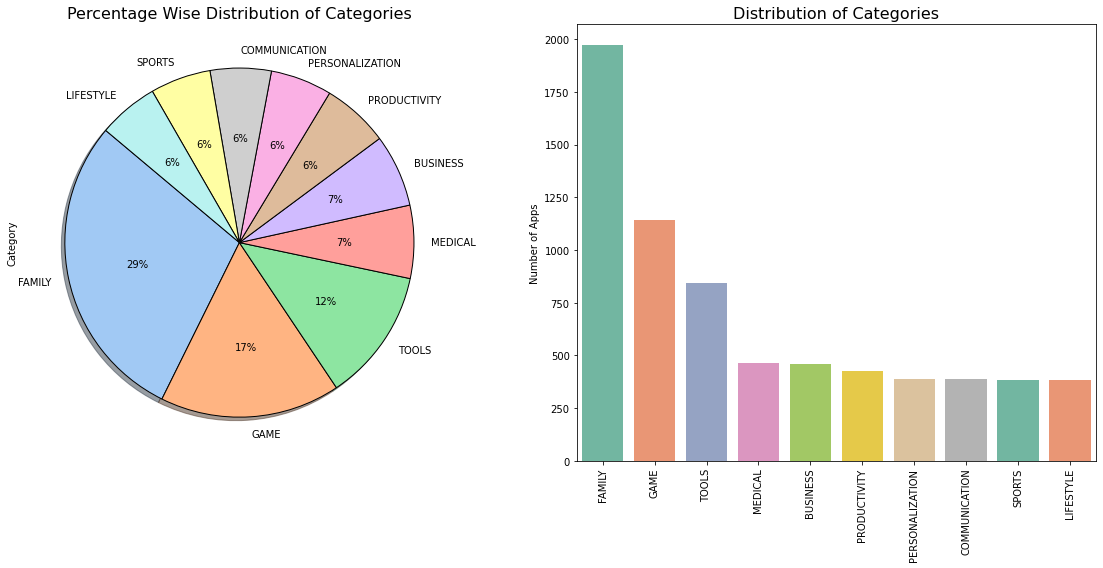

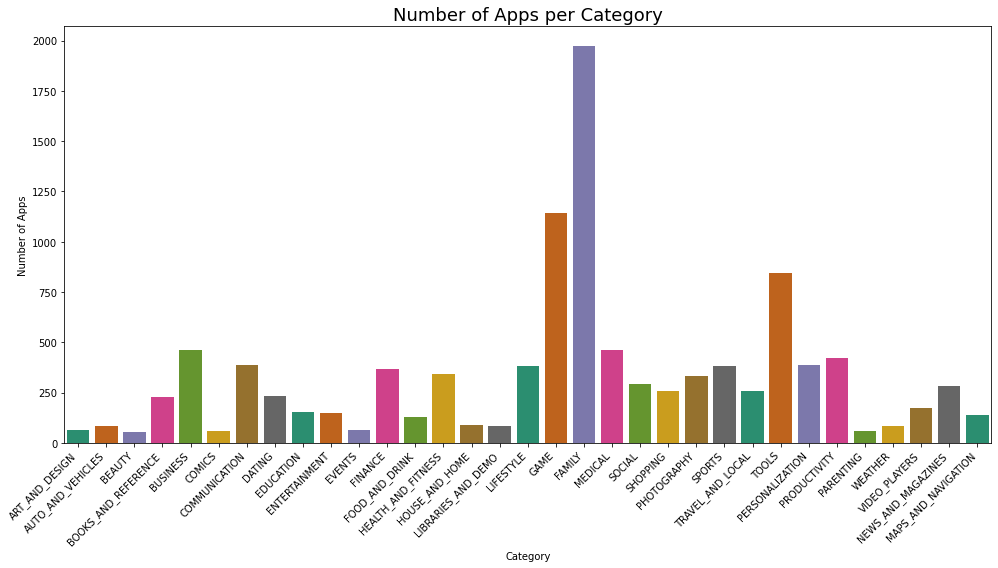

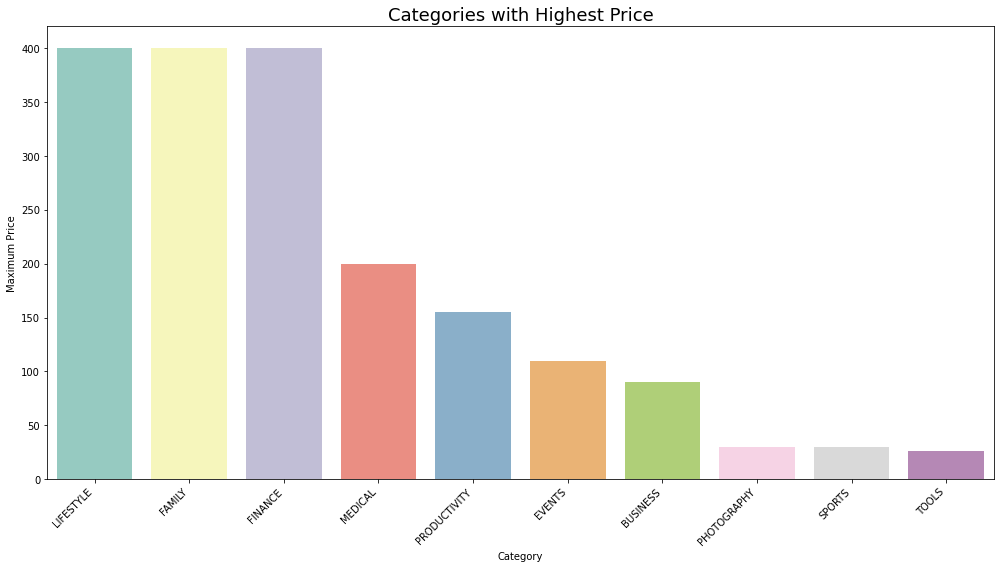

In [10]:
print_histograms(dataset)

In [11]:
def compute_correlations_matrix(dataset):
    plt.figure(figsize=(12, 10))
    sns.heatmap(dataset.corr(), annot=True, cmap='YlGnBu', linewidths=0.5)
    plt.title("Correlation Matrix", fontsize=16)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()


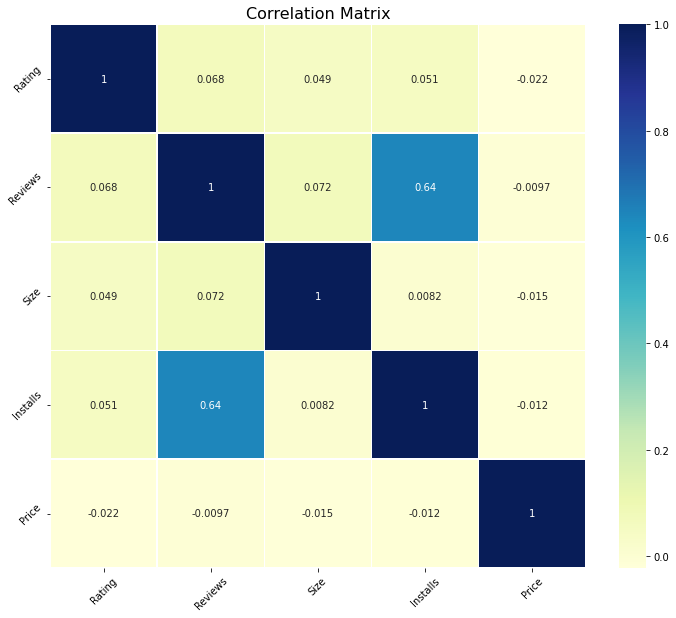

In [12]:
compute_correlations_matrix(dataset)

In [13]:
def print_scatter_matrix(dataset):
    pd.plotting.scatter_matrix(dataset, alpha=0.9, figsize=(20, 20))
    plt.show()

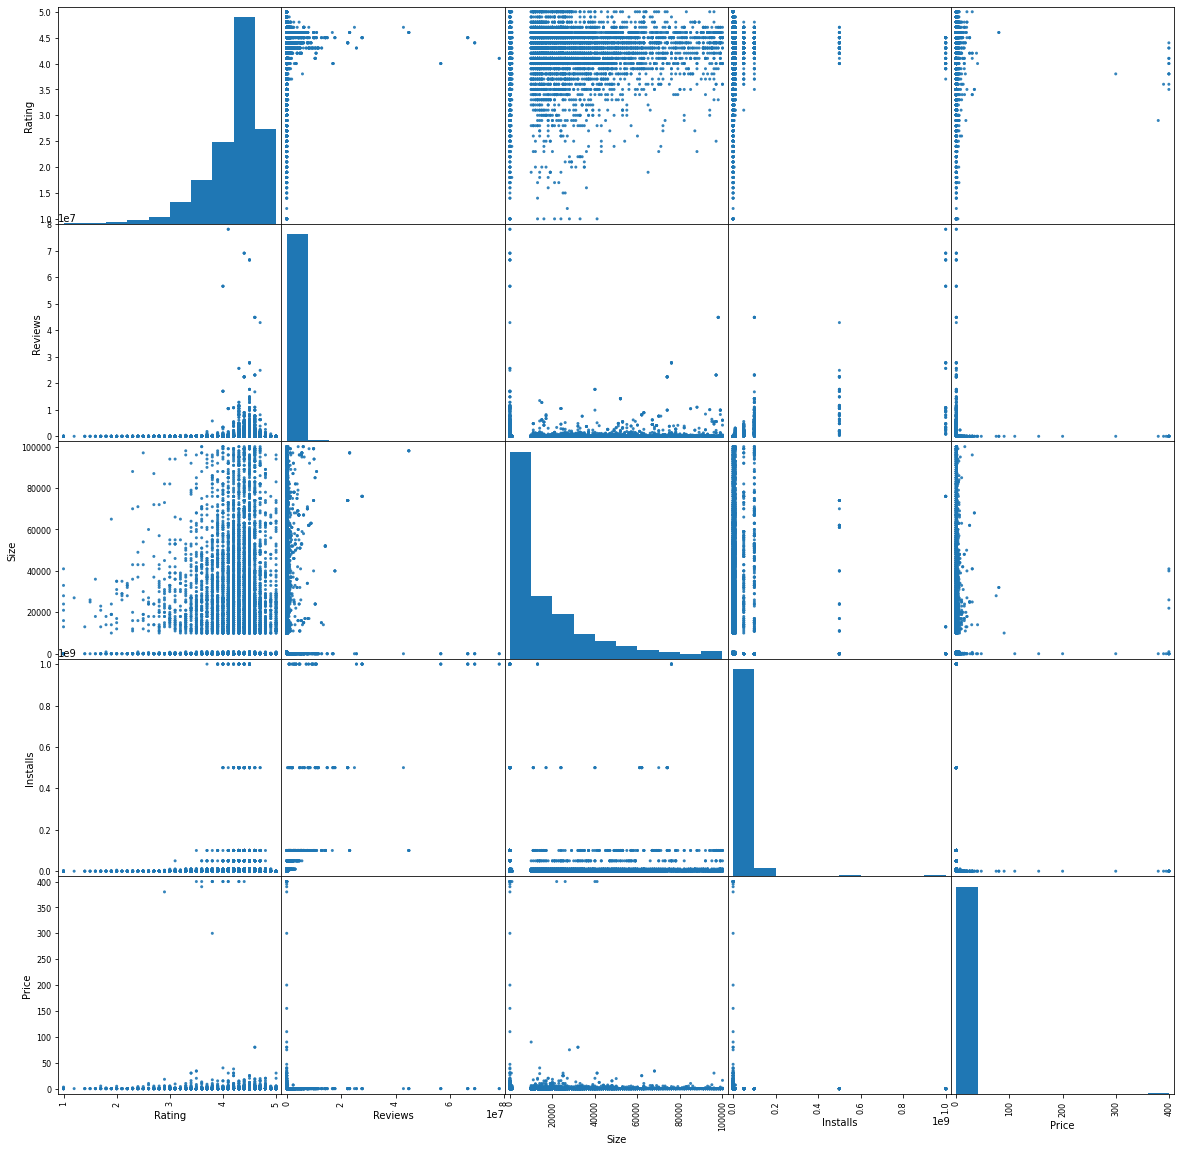

In [14]:
print_scatter_matrix(dataset)

In [15]:
!gandalf



 ██████╗ ██╗    ██╗ █████╗ ███████╗ █████╗ ██████╗    ██╗ ██████╗ 
██╔═══██╗██║    ██║██╔══██╗██╔════╝██╔══██╗██╔══██╗   ██║██╔═══██╗
██║   ██║██║ █╗ ██║███████║███████╗███████║██████╔╝   ██║██║   ██║
██║▄▄ ██║██║███╗██║██╔══██║╚════██║██╔══██║██╔══██╗   ██║██║   ██║
╚██████╔╝╚███╔███╔╝██║  ██║███████║██║  ██║██║  ██║██╗██║╚██████╔╝
 ╚══▀▀═╝  ╚══╝╚══╝ ╚═╝  ╚═╝╚══════╝╚═╝  ╚═╝╚═╝  ╚═╝╚═╝╚═╝ ╚═════╝ 
																																 
Booting Gandalf v4.0.3-df2e622 (production)
Loading parameters:  OK
User seybou-s_y connection: OK


<MY-MOBAPP-STUDIO>
Directory . exists: OK
Pushing exercise: OK
Printing your report:

      REPORT        MY-MOBAPP-STUDIO 

 Status             SUCCESS          
 Execution Runtime  4.333183         
 Score              [======] 6/6     


Checks detail Report:

 TEST CLEAN DATASET  SUCCESS 



 TEST COMPUTE CORRELATIONS MATRIX  SUCCESS 



 TEST LOAD DATASET  SUCCESS 



 TEST PRINT HISTOGRAMS  SUCCESS 



 TEST PRINT SCATTER MATRIX  SUCCESS 



 TEST PRI